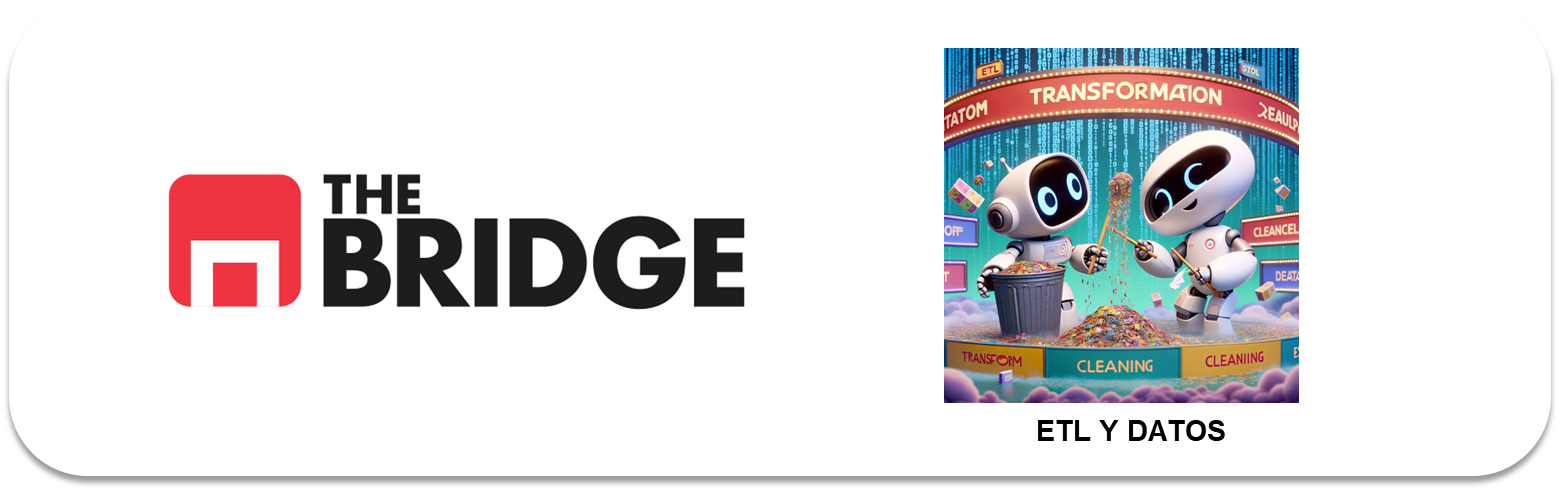

## PRACTICA OBLIGATORIA: Acceso Ficheros

* La práctica obligatoria de esta unidad consiste en varios ejercicios con tres tipos de ficheros (txt,excel y xml). Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Qué fichero para qué cosa

La librería `os` proporciona una serie de funciones para trabajar con archivos y hacer operaciones del sistema operativo. Importa la librería y haz uso de la función `listdir` para poder ver los ficheros que hay en el subdirectorio `data` que acompaña a este notebook.

In [70]:
import os
import pandas as pd

# os.listdir(directorio>) da una lista de los archivos contenidos en <directorio>
# prueba a ejecutar lo siguiente
for fichero in os.listdir("./data"):
    print(fichero)

city_sales.xlsx
mbox.txt
OptaF24.xml
spam.csv


1. Ahora crea una variable `fichero_texto`, otra `fichero_excel` y otra `fichero_xml` y asigna a cada una la ruta para acceder a cada tipo de fichero que te hayas encontrado en la salida del apartado anterior. Como recordarás una ruta es el camino para acceder a un fichero, en este caso incluye el path y el nombre del fichero (ojo os.listdir no te da el path, te da el nombre del fichero)

In [71]:
fichero_texto = "./data/mbox.txt"
fichero_excel = "./data/city_sales.xlsx"
fichero_xml = "./data/OptaF24.xml"

## #1 Fichero excel

Vamos a empezar trabajando con el fichero excel. 

1. Importa las librerías necesarias y carga los datos en un `DataFrame` el fichero cuya ruta has asignado a `fichero_excel`. Usa los argumentos necesarios para una correcta lectura

In [72]:
import pandas as pd

df = pd.read_excel(fichero_excel, sheet_name="Data_2", usecols="D, E, F, H", skiprows=(0,1, 2, 3))
 # df

2. Renombra la primera columna para que se llame "revenue" y la columna "num" por "sales"

In [73]:
df.rename(columns={'Unnamed: 3': "revenue", "num":"sales"}, inplace=True)
df

,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


3. Muestra los tipos de datos, valores totales, etc.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   revenue  40000 non-null  int64 
 1   date     40000 non-null  object
 2   sales    40000 non-null  int64 
 3   city     40000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [75]:
for col in df:
    print(df[col].value_counts())
    print("************")

revenue
1552600    1
1533974    1
1775259    1
1555668    1
997774     1
          ..
1402623    1
1765822    1
156122     1
227247     1
393907     1
Name: count, Length: 40000, dtype: int64
************
date
2017-02-06 15:14:00    4
2017-07-21 15:31:00    3
2019-01-02 14:00:00    3
2017-07-18 11:02:00    3
2015-08-20 15:07:00    3
                      ..
2015-07-30 15:01:00    1
2017-04-20 13:42:00    1
2018-12-25 09:33:00    1
2016-04-01 15:47:00    1
2018-08-02 13:32:00    1
Name: count, Length: 38637, dtype: int64
************
sales
3    19888
4     8077
2     8006
1     4029
Name: count, dtype: int64
************
city
Oxford       10126
Cambridge     9971
Durham        9966
London        9937
Name: count, dtype: int64
************


4. Convierte el campo "date" a un datetime. Conviertelo en el índice del `DataFrame`

In [76]:
# df.set_index("date", inplace=True)

# si date es el indice me da error todo lo siguiente


In [77]:
df["date"] = pd.to_datetime(df["date"])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   revenue  40000 non-null  int64         
 1   date     40000 non-null  datetime64[ns]
 2   sales    40000 non-null  int64         
 3   city     40000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.2+ MB


In [79]:
df

,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


In [80]:
df.set_index("date", inplace=True)
df

,revenue,sales,city
date,,,
2016-11-16 15:13:00,1552600,3,Cambridge
2018-02-22 13:08:00,345468,3,London
2016-01-15 15:38:00,1012061,3,Durham
2015-03-13 12:00:00,21651,3,London
2017-11-30 14:49:00,769095,4,Oxford
...,...,...,...
2017-10-09 12:35:00,304177,4,London
2015-08-21 14:21:00,1416565,3,Cambridge
2016-04-08 09:23:00,1036946,4,Durham


5. Muestra las ventas agrupadas por ciudad entre 2017 y 2018 y lo mismo con los ingresos ("revenue")

In [83]:
df.sort_index(inplace=True)
df.loc["2017":"2018"].groupby("city").sum()

,revenue,sales
city,,
Cambridge,8263779633,13715
Durham,6000637498,13687
London,1588248522,13492
Oxford,3920841678,14229


In [ ]:
sales = df.groupby('city')['sales'].sum()
revenue = df.groupby('city')['revenue'].sum()
print(sales)
print(revenue)

city
Cambridge    27830
Durham       27922
London       27827
Oxford       28434
Name: sales, dtype: int64
city
Cambridge    15670824450
Durham       11177067873
London        2213713758
Oxford        6827333383
Name: revenue, dtype: int64


5. Sobreescribe el fichero excel guardando el dataframe sin indice, pero sin perder la columna "date" en una hoja de nombre "clean_data"

In [ ]:
# df.to_excel("./data/city_sales.xlsx", sheet_name="clean_data", index=False)

## #2 Texto

Vamos a leer ahora el fichero indicado en la ruta contenida en `fichero_texto`, el objetivo es procesar el contenido para construir un `DataFrame` con las siguientes columnas direcciones de correo del emisor, veredicto de si es spam o no y confidencia en ese veredicto.

1. Crea un diccionario con las siguientes claves: "from","to","is_spam","confidence" y que cada una tenga una lista vacia.

In [ ]:
dict = {
    "from": [],
    "to": [],
    "is_spam": [],
    "confidence": []
}

2. Lee el fichero (usando `with open...`) y muestra las primeras 60 filas por pantalla, así podrás ver como es más o menos la estructura del mismo

In [ ]:
with open(fichero_texto) as f:
    for i in range(60):
        line = f.readline()
        print(line)

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008

Return-Path: <postmaster@collab.sakaiproject.org>

Received: from murder (mail.umich.edu [141.211.14.90])

	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;

	 Sat, 05 Jan 2008 09:14:16 -0500

X-Sieve: CMU Sieve 2.3

Received: from murder ([unix socket])

	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;

	 Sat, 05 Jan 2008 09:14:16 -0500

Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])

	by flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;

	Sat, 5 Jan 2008 09:14:15 -0500

Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])

	BY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ; 

	 5 Jan 2008 09:14:10 -0500

Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])

	by paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;

	Sat,  5 Jan 2008 14:10:05 +0000 (GMT)

Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>

Mime-Version: 1.0

Content-Trans

3. Ahora sabemos que el emisor viene después de "To:" el receptor después de "From:" el resultado de Spam tras "X-DSPAM-Result" y el nivel de confianza tras "X-DSPAM-Confidence", crea un programa que lea el fichero y a medida que va leyendo el texto añada cada valor (emisor, receptor, si es spam o no, nivel de confianza) a cada una de las listas del diccionario creado en 1.  
Por ejemplo, cuando llegue a una línea con "To:" que añada el correo a <diccionario>["to"]

In [ ]:
with open(fichero_texto) as f:
    for linea in f:
        if linea.startswith('From:'):
            emisor = linea.split(': ')[1].strip()
            dict['from'].append(emisor)

        elif linea.startswith('To:'):
            receptor = linea.split(': ')[1].strip()
            dict['to'].append(receptor)

        elif linea.startswith('X-DSPAM-Result:'):
            spam_result = linea.split(': ')[1].strip()
            dict['is_spam'].append(spam_result)

        elif linea.startswith('X-DSPAM-Confidence:'):
            confianza = float(linea.split(': ')[1].strip())
            dict['confidence'].append(confianza)
dict

{'from': ['stephen.marquard@uct.ac.za',
  'louis@media.berkeley.edu',
  'zqian@umich.edu',
  'rjlowe@iupui.edu',
  'zqian@umich.edu',
  'rjlowe@iupui.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu',
  'gsilver@umich.edu',
  'gsilver@umich.edu',
  'zqian@umich.edu',
  'gsilver@umich.edu',
  'wagnermr@iupui.edu',
  'zqian@umich.edu',
  'antranig@caret.cam.ac.uk',
  'gopal.ramasammycook@gmail.com',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'stephen.marquard@uct.ac.za',
  'louis@media.berkeley.edu',
  'louis@media.berkeley.edu',
  'ray@media.berkeley.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu'],
 'to': ['source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@col

4. Recorre el diccionario y muestra el número de valores de cada lista (no los valores, ojo). Es para que compruebes que todos tienen la misma longitud

In [ ]:
for clave, lista in dict.items():
    print(f"Número de elementos en {clave}: {len(lista)}")

Número de elementos en from: 27
Número de elementos en to: 27
Número de elementos en is_spam: 27
Número de elementos en confidence: 27


Si las cuatro listas no te salen de la misma longitud, repasa el código del apartado anterior.

5. Ahora ya crea un dataframe a partir del diccionario y muestra si hay algún correo declarado como spam y la confianza media. (quizá tengas que cambiar el tipo de la columna)

In [ ]:
df = pd.DataFrame(dict)

df

,from,to,is_spam,confidence
0,stephen.marquard@uct.ac.za,source@collab.sakaiproject.org,Innocent,0.8475
1,louis@media.berkeley.edu,source@collab.sakaiproject.org,Innocent,0.6178
2,zqian@umich.edu,source@collab.sakaiproject.org,Innocent,0.6961
3,rjlowe@iupui.edu,source@collab.sakaiproject.org,Innocent,0.7565
4,zqian@umich.edu,source@collab.sakaiproject.org,Innocent,0.7626
5,rjlowe@iupui.edu,source@collab.sakaiproject.org,Innocent,0.7556
6,cwen@iupui.edu,source@collab.sakaiproject.org,Innocent,0.7002
7,cwen@iupui.edu,source@collab.sakaiproject.org,Innocent,0.7615
8,gsilver@umich.edu,source@collab.sakaiproject.org,Innocent,0.7601
9,gsilver@umich.edu,source@collab.sakaiproject.org,Innocent,0.7605


6. Grába el dataframe en un fichero csv en la ruta "./data/spam.csv" con el "|" de separador y sin índice:

In [ ]:
df.to_csv("./data/spam.csv", sep="|", index=False)

## #3 XML

Es hora de procesar el fichero con la ruta xml. Carga las liberias necesarias:

In [ ]:
import xml.etree.ElementTree as ET

1. Lee el fichero tal y como has visto hacerlo en el workout, con la función `parse` de la libería adecuada (la que has importado en la celda superior)

In [ ]:
tree = ET.parse(fichero_xml)
root = tree.getroot()
root

<Element 'Games' at 0x000002A3820971F0>

2. Asigna el nodo raíz a la variable `ejer_raiz` y muestra su etiqueta (y sus atributos, si es que tiene)

In [ ]:
ejer_raiz = tree.getroot()
print(ejer_raiz.tag, ejer_raiz.attrib)

Games {'timestamp': '2012-09-11T10:20:32'}


3. Muestra cuantos hijos y nietos tiene el nodo raiz y la etiqueta de cada uno:


In [84]:
tags_hijo = []
for indice, hijo in enumerate(ejer_raiz,1):
    tags_hijo.append(hijo.tag)
    tags_nieto = []
    for nieto in hijo:
        tags_nieto.append(nieto.tag)
    print(f"Nodos para hijo {indice} con entiqueta tag: {hijo.tag}")
    print("\t", len(tags_nieto), list(set(tags_nieto)))
print()

Nodos para hijo 1 con entiqueta tag: Game
	 1673 ['Event']



4. Habrás comprobado que del nodo raíz cuelgan 1673 nodos con tag "Event", encuentra uno (<nodo_raiz>.find("Event"), pero primero tendrás que encontrar un nodo raiz, pista raiz.find("Game") y de ahi...) y pinta sus atributos


In [87]:
nodo = ejer_raiz.find("Game")
evento = nodo.find("Event")
evento.attrib

{'id': '301038339',
 'event_id': '1',
 'type_id': '34',
 'period_id': '16',
 'min': '0',
 'sec': '0',
 'team_id': '43',
 'outcome': '1',
 'x': '0.0',
 'y': '0.0',
 'timestamp': '2011-08-21T15:23:06.696',
 'last_modified': '2011-08-21T15:54:56'}

5. Recorre de nuevo los eventos y crea un dataframe con las columnas de las claves del attrib de un "Event" y como valores los valores de los atributos de los 1673 eventos que hay colgando del nodo raíz.
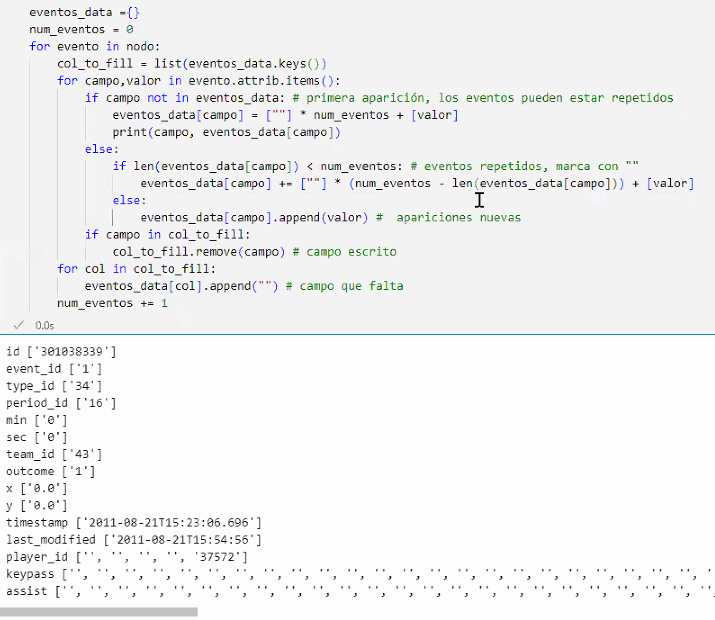